# Laptop Price Prediction


## Importing Libraries and Reading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
print(df.columns)
print(df.shape)

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')
(1303, 12)


## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
# Missing values
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
# Checking duplicated rows
df.duplicated().sum()

0

In [7]:
# removing 'Unnamed' column
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [8]:
# Removing 'GB' from 'Ram' column and making it 'int' datatype
df['Ram'] = df['Ram'].astype(str).str.replace('GB','')
df['Ram'] = df['Ram'].astype('int')

# Removing 'Kg' from 'Weight' column and making it 'float' datatype
df['Weight'] = df['Weight'].astype(str).str.replace('kg','')
df['Weight'] = df['Weight'].astype('float32')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


## Exploratory Data Analysis and Feature engineering

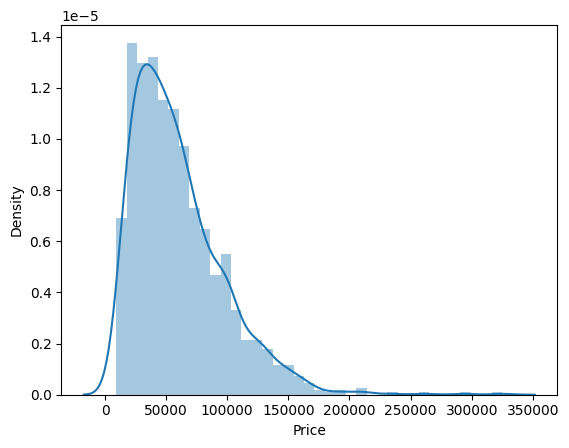

In [9]:
sns.distplot(df['Price'])
plt.show()

<Axes: xlabel='Company'>

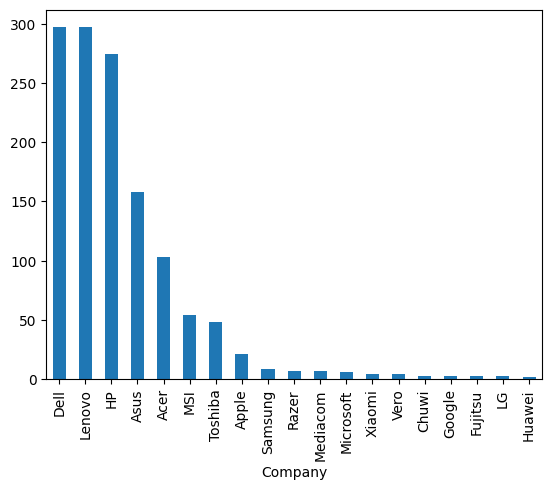

In [10]:
# Count every brand laptops
df['Company'].value_counts().plot(kind='bar')

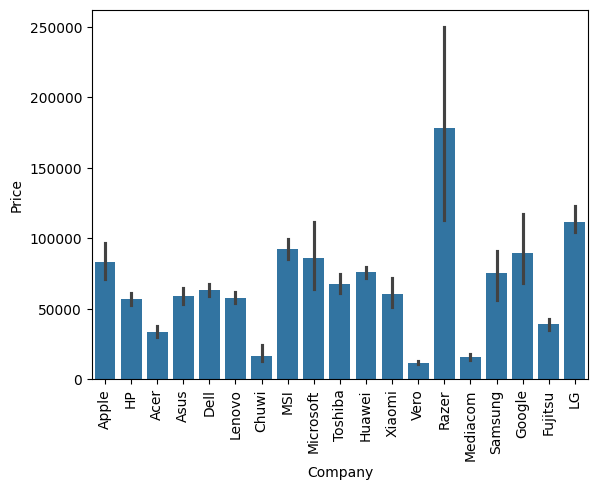

In [11]:
# Bar plot 
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

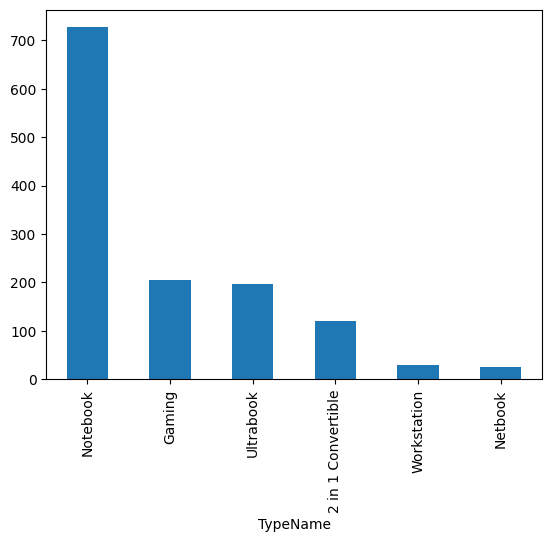

In [12]:
# different type of laptops
df['TypeName'].value_counts().plot(kind='bar')

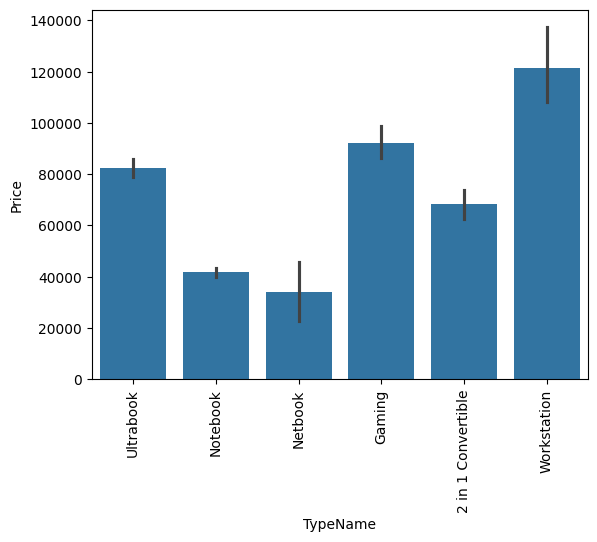

In [13]:
# Bar plot 
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Inches', ylabel='Price'>

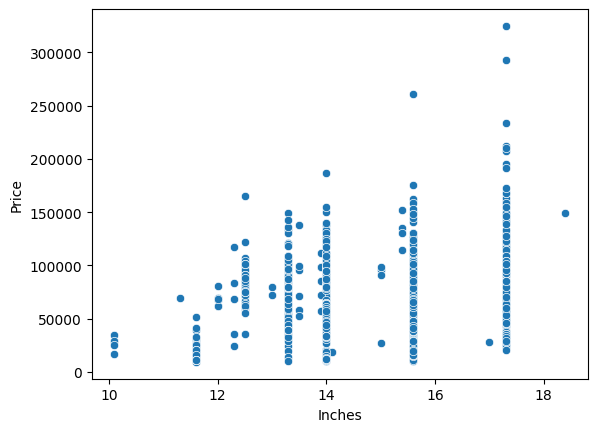

In [14]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [15]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [16]:
# Doing feature engineering to check whether a laptop is touch screen or not
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x : 1 if 'Touchscreen' in x else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
1210,Apple,Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M 1.2GHz,8,512GB Flash Storage,Intel HD Graphics 515,Mac OS X,0.92,68145.1200,0
920,Dell,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,1TB HDD,AMD Radeon R5 M420,Windows 10,2.18,36496.2672,0
654,HP,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,No OS,1.86,19441.8720,0
286,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 630,Windows 10,1.95,58448.1600,0
64,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.86,36763.2000,0


<Axes: xlabel='TouchScreen'>

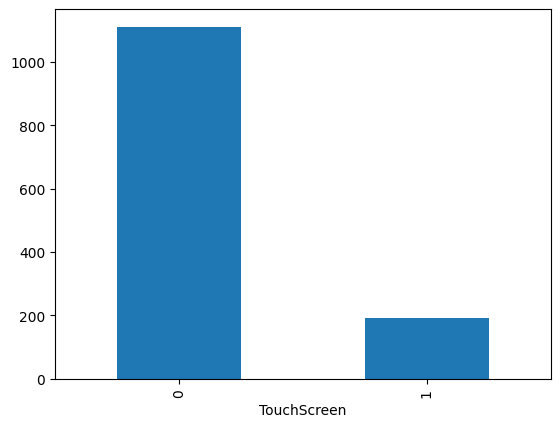

In [17]:
df['TouchScreen'].value_counts().plot(kind='bar')

<Axes: xlabel='TouchScreen', ylabel='Price'>

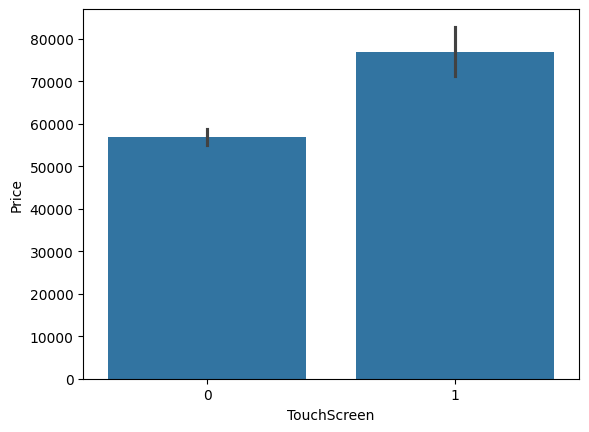

In [18]:
# How touchscreen affects the price
sns.barplot(x=df['TouchScreen'],y=df['Price'])

In [19]:
# Doing feature engineering to check whether a laptop has IPS panel
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: xlabel='IPS', ylabel='Price'>

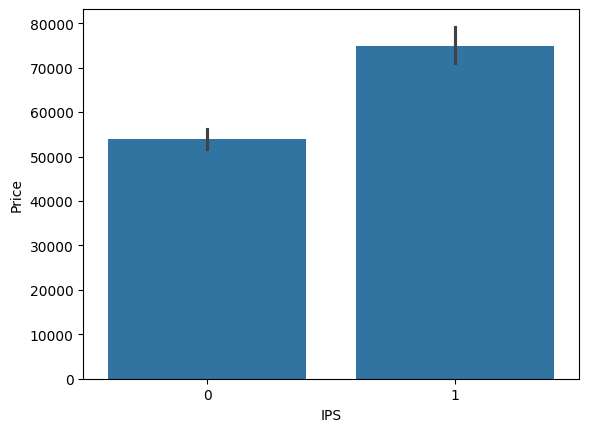

In [20]:
# How IPS panel affects the price
sns.barplot(x=df['IPS'],y=df['Price'])

In [21]:
# Finding x and y resolutions for finding ppi
# n -> at most no of splits
# expand-> true -> return df

temp = df['ScreenResolution'].str.split('x',n=1,expand=True)
df['X_res'] = temp[0]
df['Y_res'] = temp[1]
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
343,Lenovo,2 in 1 Convertible,13.9,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Intel UHD Graphics 620,Windows 10,1.40,111834.72,1,1,IPS Panel 4K Ultra HD / Touchscreen 3840,2160
1079,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 7,2.31,50083.20,0,0,Full HD 1920,1080
591,Lenovo,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,12,512GB SSD,AMD Radeon 530,Windows 10,2.20,50562.72,0,0,Full HD 1920,1080
36,Acer,Notebook,15.6,1366x768,Intel Core i3 7130U 2.7GHz,4,1TB HDD,Intel HD Graphics 620,Linux,2.10,19553.76,0,0,1366,768
942,Acer,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.23,32980.32,0,0,1366,768


In [22]:
# Using regular expressions to find X_res value , d+ -> one or more digits
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x : x[0])
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [23]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [24]:
# Use correlation matrix 
df.corr(numeric_only = True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [25]:
# Finding ppi (pixel per inches)
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5 / df['Inches']).astype('float')
df.corr(numeric_only = True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [26]:
# Dropping other columns and using ppi instead
df.drop(columns=["ScreenResolution","X_res","Y_res","Inches"],inplace=True)
df.corr(numeric_only = True)['Price']

Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
ppi            0.473487
Name: Price, dtype: float64

In [27]:
# Now doing feature engineering on 'cpu'

df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [28]:
df['CPU Name'] = df['Cpu'].apply(lambda x : ' '.join(x.split()[0:3]))
df['CPU Name'].value_counts()

CPU Name
Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1

In [29]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [30]:
df['CPU Processor'] = df['CPU Name'].apply(fetch_processor)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Name,CPU Processor
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='CPU Processor'>

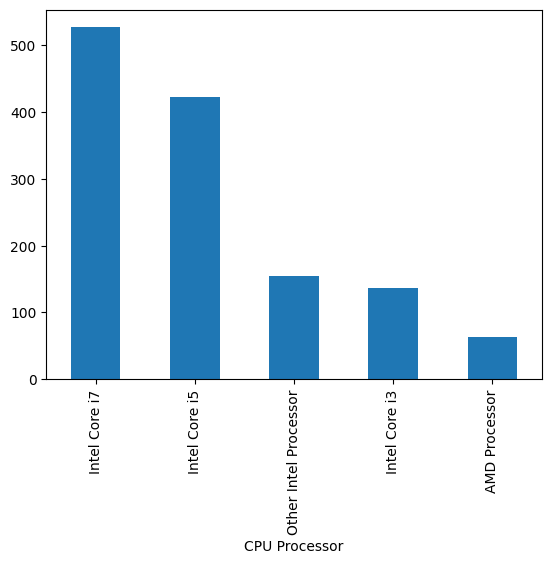

In [31]:
df['CPU Processor'].value_counts().plot(kind='bar')

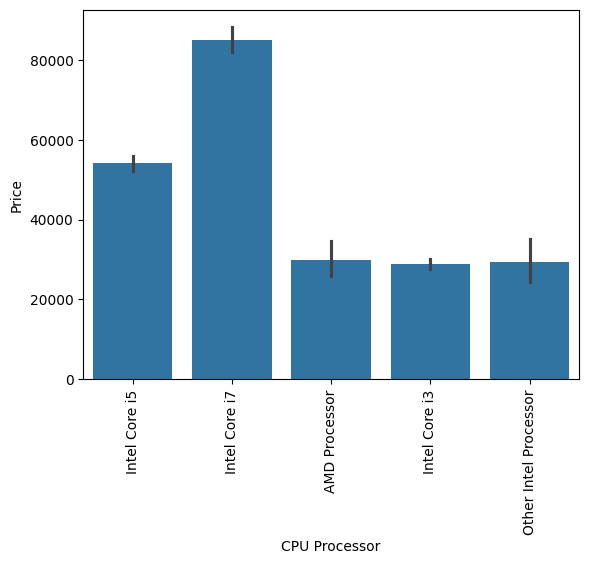

In [32]:
sns.barplot(x=df['CPU Processor'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [33]:
# DROPING cpu and cpu names columns
df.drop(columns=['Cpu','CPU Name'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Ram            1303 non-null   int32  
 3   Memory         1303 non-null   object 
 4   Gpu            1303 non-null   object 
 5   OpSys          1303 non-null   object 
 6   Weight         1303 non-null   float32
 7   Price          1303 non-null   float64
 8   TouchScreen    1303 non-null   int64  
 9   IPS            1303 non-null   int64  
 10  ppi            1303 non-null   float64
 11  CPU Processor  1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(6)
memory usage: 112.1+ KB


<Axes: xlabel='Ram'>

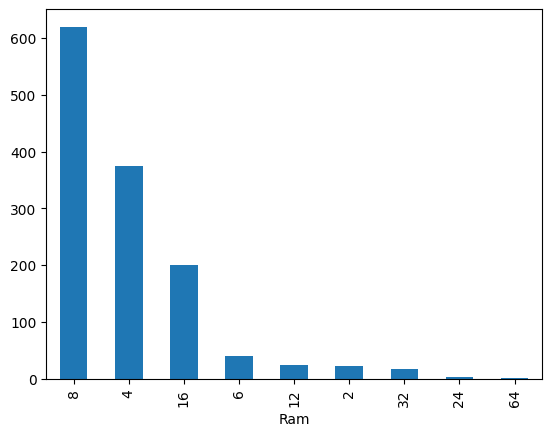

In [34]:
# EDA about the Ram
df['Ram'].value_counts().plot(kind='bar')

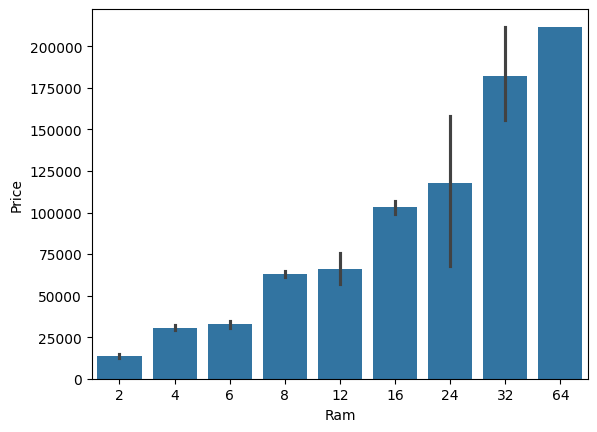

In [35]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.show()

In [36]:
# Feature Engineering on Memory column
df['Memory'].value_counts()

# 4 columns will be made SSD,HDD,Flash storage,hybrid

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [37]:
# Convert 'Memory' to string and remove '.0' if present
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)

# Remove 'GB' and replace 'TB' with '000'
df["Memory"] = df["Memory"].str.replace('GB', '', regex=False)
df["Memory"] = df["Memory"].str.replace('TB', '000', regex=False)

# Split the 'Memory' column by '+'
new = df["Memory"].str.split("+", n=1, expand=True)

# Assign first and second parts
df["first"] = new[0].str.strip()  # Strip leading/trailing whitespace
df["second"] = new[1]  # This may contain NaNs

# Identify the type of storage in 'first' and 'second'
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Replace all non-numeric characters in 'first'
df['first'] = df['first'].str.replace(r'\D', '', regex=True).str.strip()

# Handle missing values in 'second'
df["second"].fillna("0", inplace=True)

# Identify the type of storage in 'second'
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Replace all non-numeric characters in 'second'
df['second'] = df['second'].str.replace(r'\D', '', regex=True).str.strip()

# Now attempt the conversion to integers
try:
    df["first"] = df["first"].astype(int)
    df["second"] = df["second"].astype(int)
except ValueError as e:
    print("Error in conversion: ", e)
    print("Problematic values in 'first' column:", df['first'].unique())
    print("Problematic values in 'second' column:", df['second'].unique())

# Calculate the storage sizes based on the types identified
df["HDD"] = (df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"])
df["SSD"] = (df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"])
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer2Flash_Storage"])

# Drop the unnecessary columns
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
                 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
                 'Layer2Flash_Storage'], inplace=True)

df.head(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Processor,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [38]:
df.drop(columns=['Memory'],inplace=True)

In [39]:
df.corr(numeric_only = True)['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
IPS              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [40]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Processor,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [41]:
# Feature Engineering on 'Gpu'
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [42]:
df['GPU brand'] = df['Gpu'].apply(lambda x : x.split()[0])
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Processor,HDD,SSD,GPU brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [43]:
df['GPU brand'].value_counts()

GPU brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [44]:
df = df[df['GPU brand'] != 'ARM']
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Processor,HDD,SSD,GPU brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


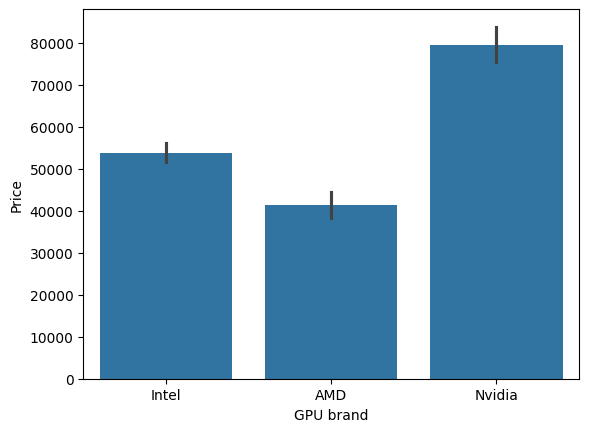

In [45]:
sns.barplot(x=df['GPU brand'],y=df['Price'])
plt.show()

In [46]:
df.drop(columns={'Gpu'},inplace=True)
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Processor,HDD,SSD,GPU brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [47]:
# Feature engineering on Operating system
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

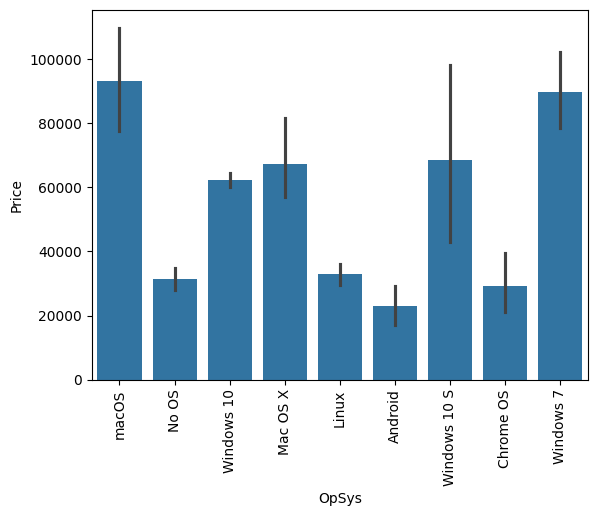

In [48]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [49]:

def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

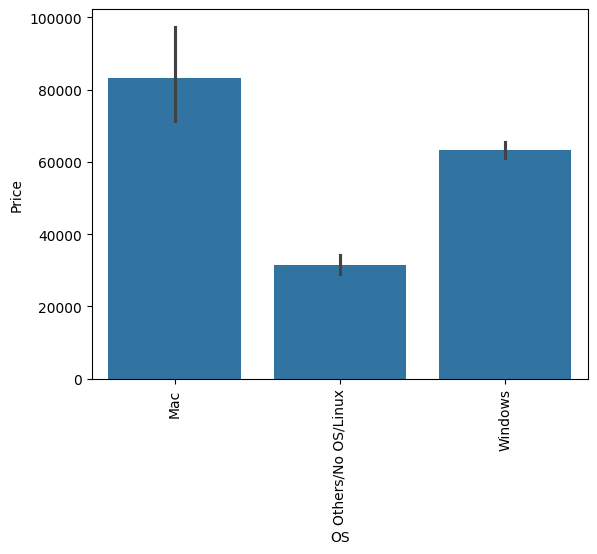

In [50]:

df['OS'] = df['OpSys'].apply(cat_os)
sns.barplot(x=df['OS'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [51]:
df.drop(columns=['OpSys'],inplace=True)
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,ppi,CPU Processor,HDD,SSD,GPU brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


<Axes: xlabel='Weight', ylabel='Density'>

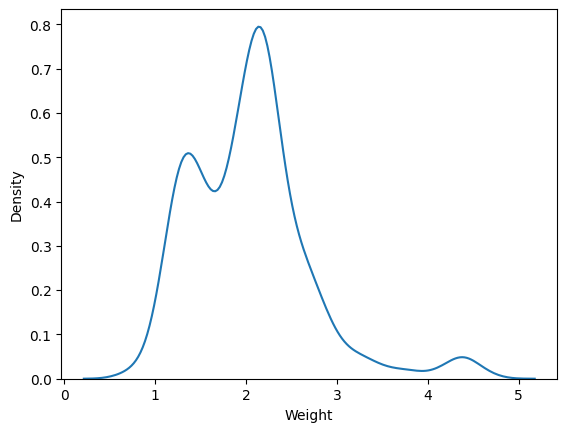

In [52]:
# EDA on weight
sns.kdeplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

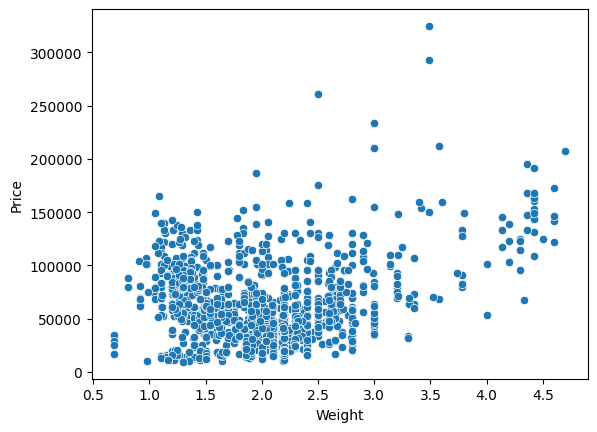

In [53]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [54]:
df.corr(numeric_only = True)['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
TouchScreen    0.192917
IPS            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<Axes: >

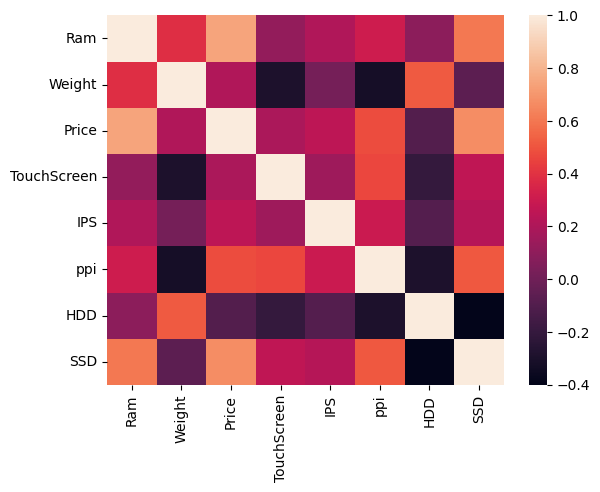

In [55]:
# Correlation Heat Map
sns.heatmap(df.corr(numeric_only=True))

<Axes: xlabel='Price', ylabel='Density'>

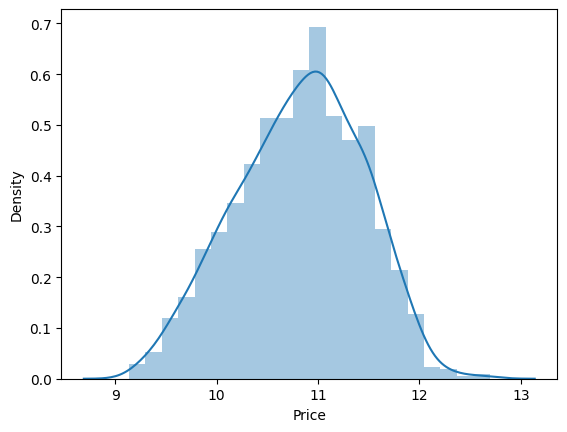

In [56]:
# As Price is skewed so performing logarithmic operation
sns.distplot(np.log(df['Price']))

## Model Selection

In [57]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])
X

,Company,TypeName,Ram,Weight,TouchScreen,IPS,ppi,CPU Processor,HDD,SSD,GPU brand,OS
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [58]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score

In [61]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor

In [62]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,ppi,CPU Processor,HDD,SSD,GPU brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1302 non-null   object 
 1   TypeName       1302 non-null   object 
 2   Ram            1302 non-null   int32  
 3   Weight         1302 non-null   float32
 4   Price          1302 non-null   float64
 5   TouchScreen    1302 non-null   int64  
 6   IPS            1302 non-null   int64  
 7   ppi            1302 non-null   float64
 8   CPU Processor  1302 non-null   object 
 9   HDD            1302 non-null   int64  
 10  SSD            1302 non-null   int64  
 11  GPU brand      1302 non-null   object 
 12  OS             1302 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(4), object(5)
memory usage: 132.2+ KB


In [64]:
results_df = pd.DataFrame(columns=['Model', 'R2 Score', 'MAE', 'MSE', 'RMSE'])

### Linear Regression

In [65]:
# Preprocessing
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# Linear Regression
step2 = LinearRegression()

# Create a pipeline
linear_regression = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit and predict
linear_regression.fit(X_train, y_train)
y_pred = linear_regression.predict(X_test)

r2_linear = r2_score(y_test, y_pred)
mae_linear = mean_absolute_error(y_test, y_pred)
mse_linear = mean_squared_error(y_test, y_pred)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred))

# Create a new DataFrame row
new_row = pd.DataFrame({
    'Model': ['Linear Regression'],
    'R2 Score': [r2_linear],
    'MAE': [mae_linear],
    'MSE': [mse_linear],
    'RMSE': [rmse_linear]
})

# Append the new row to the results_df using pd.concat
results_df = pd.concat([results_df, new_row], ignore_index=True)

# Print scores
print("R2 Score:", r2_linear)
print("Mean Absolute Error:", mae_linear)
print("Mean Squared Error:", mse_linear)
print("Root Mean Squared Error:", rmse_linear)

R2 Score: 0.807327744841867
Mean Absolute Error: 0.2101782797642868
Mean Squared Error: 0.07370698695036522
Root Mean Squared Error: 0.27149030728621826


### Ridge Regression

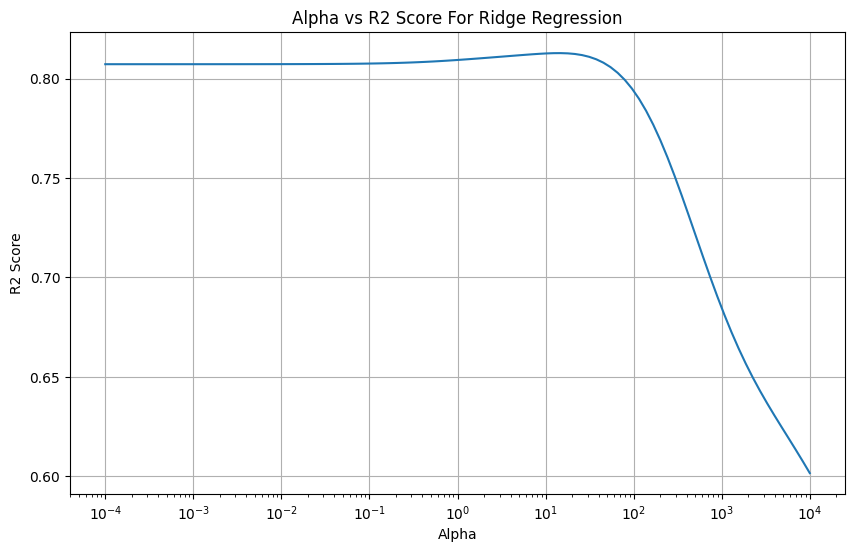

R2 Score: 0.8127331031311809
Mean Absolute Error: 0.20926802242582962
Mean Squared Error: 0.07163916108428232
Root Mean Squared Error: 0.26765492912382977


In [66]:
# Preprocessing
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# Defining the range of alpha values
alpha_values = np.logspace(-4, 4, 100)

# Initializing an empty list to store the r2_scores for each alpha
r2_scores = []

# Loop over alpha values
for alpha in alpha_values:
    # Create a new Ridge Regression model with the current alpha value
    step2 = Ridge(alpha=alpha)
    # Create a pipeline
    ridge_regression = Pipeline([
        ('step1', step1),
        ('step2', step2)
    ])
    # Fit and predict
    ridge_regression.fit(X_train, y_train)
    y_pred = ridge_regression.predict(X_test)
    
    # Calculate and store the r2_score
    r2_scores.append(r2_score(y_test, y_pred))

# Plot alpha values vs. r2_scores
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, r2_scores)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title('Alpha vs R2 Score For Ridge Regression')
plt.grid(True)
plt.show()

# Ridge Regression with a specific alpha
step2 = Ridge(alpha=10)

# Create a pipeline
ridge_regression = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit and predict
ridge_regression.fit(X_train, y_train)
y_pred = ridge_regression.predict(X_test)

# Calculate metrics
r2_ridge = r2_score(y_test, y_pred)
mae_ridge = mean_absolute_error(y_test, y_pred)
mse_ridge = mean_squared_error(y_test, y_pred)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred))

# Create a new DataFrame row
new_row_ridge = pd.DataFrame({
    'Model': ['Ridge Regression (alpha=10)'],
    'R2 Score': [r2_ridge],
    'MAE': [mae_ridge],
    'MSE': [mse_ridge],
    'RMSE': [rmse_ridge]
})

# Append the new row to the results_df using pd.concat
results_df = pd.concat([results_df, new_row_ridge], ignore_index=True)

# Print scores
print("R2 Score:", r2_ridge)
print("Mean Absolute Error:", mae_ridge)
print("Mean Squared Error:", mse_ridge)
print("Root Mean Squared Error:", rmse_ridge)


### Lasso Regression

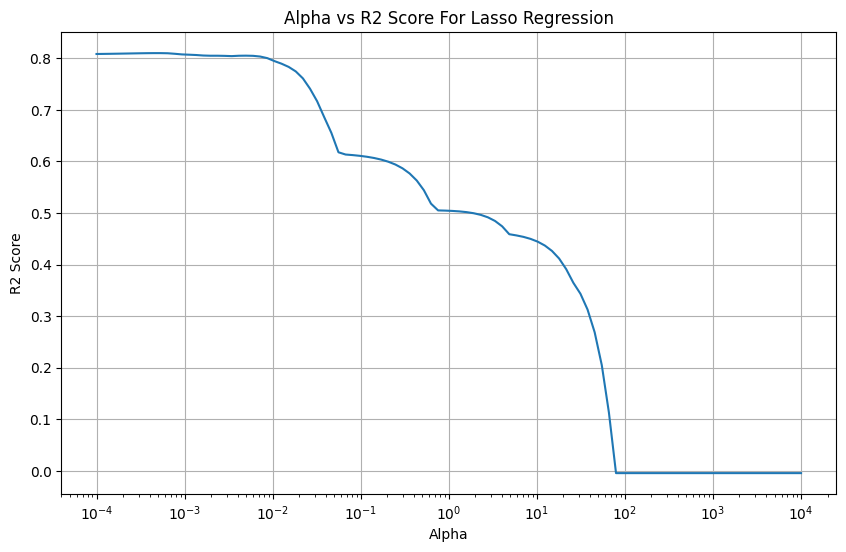

R2 Score: 0.8071853945317105
Mean Absolute Error: 0.21114361613472565
Mean Squared Error: 0.07376144322090857
Root Mean Squared Error: 0.27159058014023346


In [67]:
# Preprocessing
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# Defining the range of alpha values
alpha_values = np.logspace(-4, 4, 100)

# Initializing an empty list to store the r2_scores for each alpha
r2_scores = []

# Loop over alpha values
for alpha in alpha_values:
    # Create a new Lasso Regression model with the current alpha value
    step2 = Lasso(alpha=alpha)
    
    # Create a pipeline
    lasso_regression = Pipeline([
        ('step1', step1),
        ('step2', step2)
    ])
    
    # Fit and predict
    lasso_regression.fit(X_train, y_train)
    y_pred = lasso_regression.predict(X_test)
    
    # Calculate and store the r2_score
    r2_scores.append(r2_score(y_test, y_pred))

# Plot alpha values vs. r2_scores
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, r2_scores)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title('Alpha vs R2 Score For Lasso Regression')
plt.grid(True)
plt.show()

# Lasso Regression with a specific alpha
step2 = Lasso(alpha=0.001)

# Create a pipeline
lasso_regression = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit and predict
lasso_regression.fit(X_train, y_train)
y_pred = lasso_regression.predict(X_test)

# Calculate metrics
r2_lasso = r2_score(y_test, y_pred)
mae_lasso = mean_absolute_error(y_test, y_pred)
mse_lasso = mean_squared_error(y_test, y_pred)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred))

# Create a new DataFrame row
new_row_lasso = pd.DataFrame({
    'Model': ['Lasso Regression (alpha=0.001)'],
    'R2 Score': [r2_lasso],
    'MAE': [mae_lasso],
    'MSE': [mse_lasso],
    'RMSE': [rmse_lasso]
})

# Append the new row to the results_df using pd.concat
results_df = pd.concat([results_df, new_row_lasso], ignore_index=True)

# Print scores
print("R2 Score:", r2_lasso)
print("Mean Absolute Error:", mae_lasso)
print("Mean Squared Error:", mse_lasso)
print("Root Mean Squared Error:", rmse_lasso)

### KNN

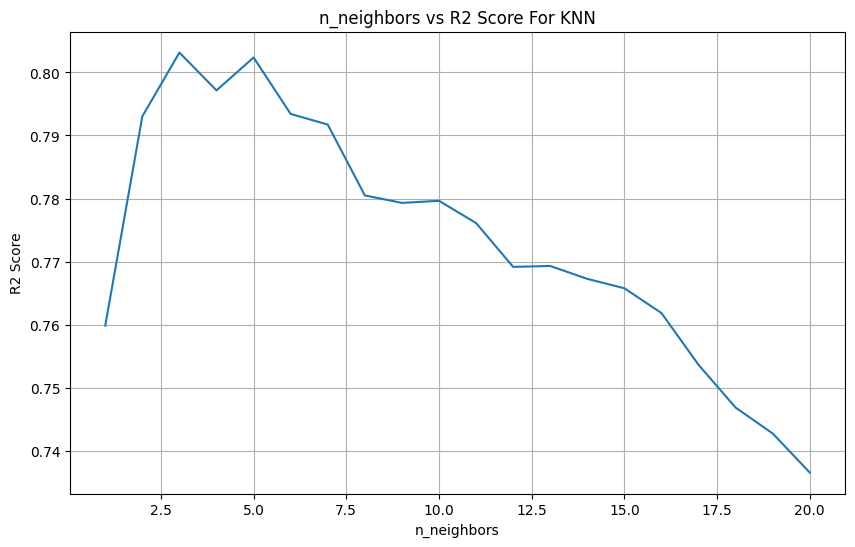

R2 Score: 0.803148868705085
Mean Absolute Error: 0.19264883332948868
Mean Squared Error: 0.07530562069567633
Root Mean Squared Error: 0.2744186959659934


In [68]:
# Preprocessing
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# Defining the range of n_neighbors values
n_neighbors_values = range(1, 21)

# Initializing an empty list to store the r2_scores for each value of n_neighbors
r2_scores = []

# Loop over n_neighbors values
for n_neighbors in n_neighbors_values:
    # Create a new KNN Regression model with the current n_neighbors value
    step2 = KNeighborsRegressor(n_neighbors=n_neighbors)
    
    # Create a pipeline
    knn = Pipeline([
        ('step1', step1),
        ('step2', step2)
    ])
    
    # Fit and predict
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Calculate and store the r2_score
    r2_scores.append(r2_score(y_test, y_pred))

# Plot n_neighbors values vs. r2_scores
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, r2_scores)
plt.xlabel('n_neighbors')
plt.ylabel('R2 Score')
plt.title('n_neighbors vs R2 Score For KNN')
plt.grid(True)
plt.show()

# K-Nearest Neighbors Regression with a specific n_neighbors
step2 = KNeighborsRegressor(n_neighbors=3)

# Create a pipeline
knn = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit and predict
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calculate metrics
r2_knn = r2_score(y_test, y_pred)
mae_knn = mean_absolute_error(y_test, y_pred)
mse_knn = mean_squared_error(y_test, y_pred)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred))

# Create a new DataFrame row
new_row_knn = pd.DataFrame({
    'Model': ['KNN Regression (n_neighbors=3)'],
    'R2 Score': [r2_knn],
    'MAE': [mae_knn],
    'MSE': [mse_knn],
    'RMSE': [rmse_knn]
})

# Append the new row to the results_df using pd.concat
results_df = pd.concat([results_df, new_row_knn], ignore_index=True)

# Print scores
print("R2 Score:", r2_knn)
print("Mean Absolute Error:", mae_knn)
print("Mean Squared Error:", mse_knn)
print("Root Mean Squared Error:", rmse_knn)

### Decision Tree

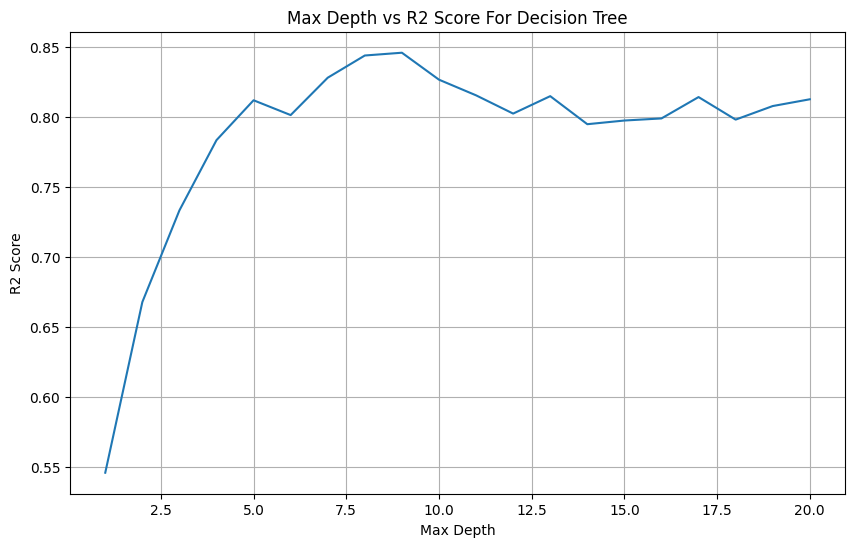

R2 Score: 0.8325547802216968
Mean Absolute Error: 0.18603289892296462
Mean Squared Error: 0.06405635631851095
Root Mean Squared Error: 0.2530935722583862


In [69]:
# Preprocessing
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# Define the range of max_depth values
max_depth_values = range(1, 21)

# Initializing an empty list to store the r2_scores for each value of max depth
r2_scores = []

# Loop over max_depth values
for max_depth in max_depth_values:
    # Create a new Decision Tree Regression model with the current max_depth value
    step2 = DecisionTreeRegressor(max_depth=max_depth)
    
    # Create a pipeline
    decision_tree = Pipeline([
        ('step1', step1),
        ('step2', step2)
    ])
    
    # Fit and predict
    decision_tree.fit(X_train, y_train)
    y_pred = decision_tree.predict(X_test)
    
    # Calculate and store the r2_score
    r2_scores.append(r2_score(y_test, y_pred))

# Plot max_depth values vs. r2_scores
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, r2_scores)
plt.xlabel('Max Depth')
plt.ylabel('R2 Score')
plt.title('Max Depth vs R2 Score For Decision Tree')
plt.grid(True)
plt.show()

# Decision Tree Regression with a specific max_depth
step2 = DecisionTreeRegressor(max_depth=8)

# Create a pipeline
decision_tree = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit and predict
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

# Calculate metrics
r2_tree = r2_score(y_test, y_pred)
mae_tree = mean_absolute_error(y_test, y_pred)
mse_tree = mean_squared_error(y_test, y_pred)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred))

# Create a new DataFrame row
new_row_tree = pd.DataFrame({
    'Model': ['Decision Tree Regression (max_depth=8)'],
    'R2 Score': [r2_tree],
    'MAE': [mae_tree],
    'MSE': [mse_tree],
    'RMSE': [rmse_tree]
})

# Append the new row to the results_df using pd.concat
results_df = pd.concat([results_df, new_row_tree], ignore_index=True)

# Print scores
print("R2 Score:", r2_tree)
print("Mean Absolute Error:", mae_tree)
print("Mean Squared Error:", mse_tree)
print("Root Mean Squared Error:", rmse_tree)

### SVM

In [70]:
# Preprocessing
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# SVM Regressor
step2 = SVR(kernel='rbf', C=10000, epsilon=0.1)

# Create a pipeline
svm = Pipeline([
    ('step1', step1), 
    ('step2', step2)
])

# Fit and predict
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Calculate metrics
r2_svm = r2_score(y_test, y_pred)
mae_svm = mean_absolute_error(y_test, y_pred)
mse_svm = mean_squared_error(y_test, y_pred)
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred))

# Create a new DataFrame row
new_row_svm = pd.DataFrame({
    'Model': ['SVM Regression'],
    'R2 Score': [r2_svm],
    'MAE': [mae_svm],
    'MSE': [mse_svm],
    'RMSE': [rmse_svm]
})

# Append the new row to the results_df using pd.concat
results_df = pd.concat([results_df, new_row_svm], ignore_index=True)

# Print scores
print("R2 Score:", r2_svm)
print("Mean Absolute Error:", mae_svm)
print("Mean Squared Error:", mse_svm)
print("Root Mean Squared Error:", rmse_svm)

R2 Score: 0.8083180902283282
Mean Absolute Error: 0.2023905942725167
Mean Squared Error: 0.07332812921386163
Root Mean Squared Error: 0.27079167124167913


### Random Forest

In [71]:
# Preprocessing
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# Random Forest Regressor
step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

# Create a pipeline
random_forest = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit and predict
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

# Calculate metrics
r2_rf = r2_score(y_test, y_pred)
mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))

# Create a new DataFrame row
new_row_rf = pd.DataFrame({
    'Model': ['Random Forest Regression'],
    'R2 Score': [r2_rf],
    'MAE': [mae_rf],
    'MSE': [mse_rf],
    'RMSE': [rmse_rf]
})

# Append the new row to the results_df using pd.concat
results_df = pd.concat([results_df, new_row_rf], ignore_index=True)

# Print scores
print("R2 Score:", r2_rf)
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("Root Mean Squared Error:", rmse_rf)

R2 Score: 0.8873402378382488
Mean Absolute Error: 0.15860130110457718
Mean Squared Error: 0.043098118162743296
Root Mean Squared Error: 0.20760086262523886


### Extra Trees

In [72]:
# Preprocessing
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# Extra Trees with bootstrapping enabled
step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15,
                              bootstrap=True)

# Create a pipeline
extra_trees = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit and predict
extra_trees.fit(X_train, y_train)
y_pred = extra_trees.predict(X_test)

# Calculate metrics
r2_et = r2_score(y_test, y_pred)
mae_et = mean_absolute_error(y_test, y_pred)
mse_et = mean_squared_error(y_test, y_pred)
rmse_et = np.sqrt(mean_squared_error(y_test, y_pred))

# Create a new DataFrame row
new_row_et = pd.DataFrame({
    'Model': ['Extra Trees Regression'],
    'R2 Score': [r2_et],
    'MAE': [mae_et],
    'MSE': [mse_et],
    'RMSE': [rmse_et]
})

# Append the new row to the results_df using pd.concat
results_df = pd.concat([results_df, new_row_et], ignore_index=True)

# Print scores
print("R2 Score:", r2_et)
print("Mean Absolute Error:", mae_et)
print("Mean Squared Error:", mse_et)
print("Root Mean Squared Error:", rmse_et)

R2 Score: 0.8850720167552375
Mean Absolute Error: 0.16154538000217084
Mean Squared Error: 0.04396582867782936
Root Mean Squared Error: 0.2096803011201323


### AdaBoost

In [73]:
# Preprocessing
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# AdaBoost Regressor
step2 = AdaBoostRegressor(n_estimators=15, learning_rate=1.0)

# Create a pipeline
ada_boost = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit and predict
ada_boost.fit(X_train, y_train)
y_pred = ada_boost.predict(X_test)

# Calculate metrics
r2_ada = r2_score(y_test, y_pred)
mae_ada = mean_absolute_error(y_test, y_pred)
mse_ada = mean_squared_error(y_test, y_pred)
rmse_ada = np.sqrt(mean_squared_error(y_test, y_pred))

# Create a new DataFrame row
new_row_ada = pd.DataFrame({
    'Model': ['AdaBoost Regressor'],
    'R2 Score': [r2_ada],
    'MAE': [mae_ada],
    'MSE': [mse_ada],
    'RMSE': [rmse_ada]
})

# Append the new row to the results_df using pd.concat
results_df = pd.concat([results_df, new_row_ada], ignore_index=True)

# Print scores
print("R2 Score:", r2_ada)
print("Mean Absolute Error:", mae_ada)
print("Mean Squared Error:", mse_ada)
print("Root Mean Squared Error:", rmse_ada)

R2 Score: 0.7970152543079991
Mean Absolute Error: 0.22706767247745116
Mean Squared Error: 0.0776520417512327
Root Mean Squared Error: 0.2786611593875844


### Gradient Boost

In [74]:
# Preprocessing
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# Gradient Boosting
step2 = GradientBoostingRegressor(n_estimators=500)

# Create a pipeline
gradient_boost = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit and predict
gradient_boost.fit(X_train, y_train)
y_pred = gradient_boost.predict(X_test)

# Calculate metrics
r2_gradient = r2_score(y_test, y_pred)
mae_gradient = mean_absolute_error(y_test, y_pred)
mse_gradient = mean_squared_error(y_test, y_pred)
rmse_gradient = np.sqrt(mean_squared_error(y_test, y_pred))

# Create a new DataFrame row
new_row_gradient = pd.DataFrame({
    'Model': ['Gradient Boosting Regressor'],
    'R2 Score': [r2_gradient],
    'MAE': [mae_gradient],
    'MSE': [mse_gradient],
    'RMSE': [rmse_gradient]
})

# Append the new row to the results_df using pd.concat
results_df = pd.concat([results_df, new_row_gradient], ignore_index=True)

# Print scores
print("R2 Score:", r2_gradient)
print("Mean Absolute Error:", mae_gradient)
print("Mean Squared Error:", mse_gradient)
print("Root Mean Squared Error:", rmse_gradient)

R2 Score: 0.8818302515829086
Mean Absolute Error: 0.15986177641782864
Mean Squared Error: 0.0452059695743839
Root Mean Squared Error: 0.21261695504917735


### XgBoost

In [75]:
# # Preprocessing
# step1 = ColumnTransformer(transformers=[
#     ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
# ], remainder='passthrough')

# # XGBoost Regressor
# step2 = XGBRegressor(n_estimators=45, max_depth=5, learning_rate=0.5)

# # Create a pipeline
# xgb = Pipeline([
#     ('step1', step1),
#     ('step2', step2)
# ])

# # Fit and predict
# xgb.fit(X_train, y_train)
# y_pred = xgb.predict(X_test)

# # Calculate metrics
# r2_xgb = r2_score(y_test, y_pred)
# mae_xgb = mean_absolute_error(y_test, y_pred)
# mse_xgb = mean_squared_error(y_test, y_pred)
# rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))

# # Create a new DataFrame row
# new_row_gradient = pd.DataFrame({
#     'Model': ['Gradient Boosting Regressor'],
#     'R2 Score': [r2_xgb],
#     'MAE': [mae_xgb],
#     'MSE': [mse_xgb],
#     'RMSE': [rmse_xgb]
# })

# # Append the new row to the results_df using pd.concat
# results_df = pd.concat([results_df, new_row_gradient], ignore_index=True)

# # Print scores
# print("R2 Score:", r2_xgb)
# print("Mean Absolute Error:", mae_xgb)
# print("Mean Squared Error:", mse_xgb)
# print("Root Mean Squared Error:", rmse_xgb)

### Voting Regressor

In [76]:
# Preprocessing
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# Define individual models
rf = RandomForestRegressor(n_estimators=350, random_state=3, max_samples=None, max_features=0.75, max_depth=15, bootstrap=True)
gbdt = GradientBoostingRegressor(n_estimators=100, max_features=0.5)
et = ExtraTreesRegressor(n_estimators=100, random_state=3, max_samples=None, max_features=0.75, max_depth=10, bootstrap=True)

# Define the Voting Regressor with correct weights
step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('et', et)], weights=[5, 1, 1])

# Create a pipeline
voting_regressor = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit and predict
voting_regressor.fit(X_train, y_train)
y_pred = voting_regressor.predict(X_test)

# Calculate metrics
r2_voting = r2_score(y_test, y_pred)
mae_voting = mean_absolute_error(y_test, y_pred)
mse_voting = mean_squared_error(y_test, y_pred)
rmse_voting = np.sqrt(mean_squared_error(y_test, y_pred))

# Create a new DataFrame row
new_row_voting = pd.DataFrame({
    'Model': ['Voting Regressor'],
    'R2 Score': [r2_voting],
    'MAE': [mae_voting],
    'MSE': [mse_voting],
    'RMSE': [rmse_voting]
})

# Append the new row to the results_df using pd.concat
results_df = pd.concat([results_df, new_row_voting], ignore_index=True)

# Print scores
print("R2 Score:", r2_voting)
print("Mean Absolute Error:", mae_voting)
print("Mean Squared Error:", mse_voting)
print("Root Mean Squared Error:", rmse_voting)

R2 Score: 0.8909772557875562
Mean Absolute Error: 0.1560134549885213
Mean Squared Error: 0.04170677287378188
Root Mean Squared Error: 0.20422236134611185


### Comparing the Models

In [77]:
print("Results DataFrame:")
results_df

Results DataFrame:


,Model,R2 Score,MAE,MSE,RMSE
0,Linear Regression,0.807328,0.210178,0.073707,0.271490
1,Ridge Regression (alpha=10),0.812733,0.209268,0.071639,0.267655
2,Lasso Regression (alpha=0.001),0.807185,0.211144,0.073761,0.271591
3,KNN Regression (n_neighbors=3),0.803149,0.192649,0.075306,0.274419
4,Decision Tree Regression (max_depth=8),0.832555,0.186033,0.064056,0.253094
5,SVM Regression,0.808318,0.202391,0.073328,0.270792
6,Random Forest Regression,0.887340,0.158601,0.043098,0.207601
7,Extra Trees Regression,0.885072,0.161545,0.043966,0.209680
8,AdaBoost Regressor,0.797015,0.227068,0.077652,0.278661
9,Gradient Boosting Regressor,0.881830,0.159862,0.045206,0.212617


In [78]:
# Identify the best model based on R2 Score
best_r2_model = results_df.loc[results_df['R2 Score'].idxmax()]
print("\nBest Model based on R2 Score:")
print(best_r2_model)

# Identify the best model based on MAE
best_mae_model = results_df.loc[results_df['MAE'].idxmin()]
print("\nBest Model based on MAE:")
print(best_mae_model)

# Identify the best model based on MSE
best_mse_model = results_df.loc[results_df['MSE'].idxmin()]
print("\nBest Model based on MSE:")
print(best_mse_model)

# Identify the best model based on RMSE
best_rmse_model = results_df.loc[results_df['RMSE'].idxmin()]
print("\nBest Model based on RMSE:")
print(best_rmse_model)


Best Model based on R2 Score:
Model       Voting Regressor
R2 Score            0.890977
MAE                 0.156013
MSE                 0.041707
RMSE                0.204222
Name: 10, dtype: object

Best Model based on MAE:
Model       Voting Regressor
R2 Score            0.890977
MAE                 0.156013
MSE                 0.041707
RMSE                0.204222
Name: 10, dtype: object

Best Model based on MSE:
Model       Voting Regressor
R2 Score            0.890977
MAE                 0.156013
MSE                 0.041707
RMSE                0.204222
Name: 10, dtype: object

Best Model based on RMSE:
Model       Voting Regressor
R2 Score            0.890977
MAE                 0.156013
MSE                 0.041707
RMSE                0.204222
Name: 10, dtype: object


In [79]:
# Initialize an empty list to store user input
user_input = []

# Ask the user for each feature
user_input.append(input("Company (e.g., Asus): "))
user_input.append(input("TypeName (e.g., Gaming): "))
user_input.append(float(input("RAM (e.g., 8): ")))
user_input.append(float(input("Weight (e.g., 1.37): ")))
user_input.append(int(input("Touchscreen (0 for No, 1 for Yes): ")))
user_input.append(int(input("IPS (0 for No, 1 for Yes): ")))
user_input.append(float(input("PPI (e.g., 226.983): ")))
user_input.append(input("CPU (e.g., Intel Core i7): "))
user_input.append(int(input("HDD (e.g., 1000): ")))
user_input.append(int(input("SSD (e.g., 128): ")))
user_input.append(input("GPU (e.g., Nvidia): "))
user_input.append(input("Operating System (e.g., Windows): "))

# Convert the user input list to a numpy array
user_input_array = np.array([user_input])

# Use the fitted voting_regressor pipeline to predict the price for the user's laptop features
predicted_price = voting_regressor.predict(user_input_array)

# Print the predicted price
print("Predicted Price:", (np.e)**predicted_price[0])


Company (e.g., Asus):  Asus
TypeName (e.g., Gaming):  Gaming
RAM (e.g., 8):  16
Weight (e.g., 1.37):  2
Touchscreen (0 for No, 1 for Yes):  0
IPS (0 for No, 1 for Yes):  1
PPI (e.g., 226.983):  160
CPU (e.g., Intel Core i7):  Intel Core i5
HDD (e.g., 1000):  0
SSD (e.g., 128):  512
GPU (e.g., Nvidia):  Nvidia
Operating System (e.g., Windows):  Windows


Predicted Price: 94449.32042742804


## Exporting the Model

In [81]:
import pickle

df.to_parquet('df.parquet', engine='pyarrow', index=False)
pickle.dump(voting_regressor,open('pipe.pkl','wb'))